In [1]:
import embedders

In [5]:
X, labels, _ = embedders.dataloaders.load("mnist")
X

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

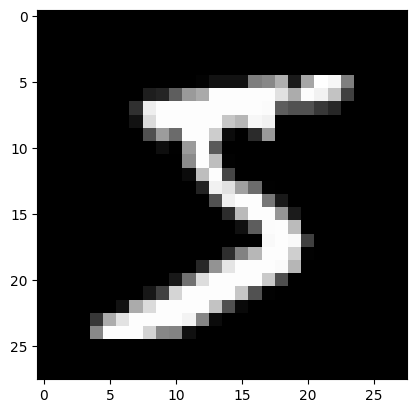

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28, 28).numpy(), cmap="gray")

In [9]:
X.shape

torch.Size([60000, 28, 28])

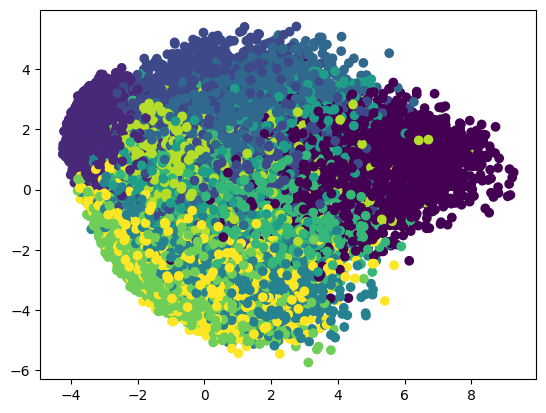

In [13]:
# Take top 6 principal components

from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_pca = pca.fit_transform(X.reshape(-1, 28*28).numpy())

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.2)

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f1_score(y_test, y_pred, average="micro"))

rf = RandomForestClassifier(n_estimators=12, max_depth=3)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f1_score(y_test, y_pred, average="micro"))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f1_score(y_test, y_pred, average="micro"))

0.3928333333333333
0.6233333333333333
0.8310833333333333


In [17]:
# non-pca version

X_np = X.reshape(-1, 28*28).numpy()
X_train, X_test, y_train, y_test = train_test_split(X_np, labels, test_size=0.2)

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f1_score(y_test, y_pred, average="micro"))

rf = RandomForestClassifier(n_estimators=12, max_depth=3)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f1_score(y_test, y_pred, average="micro"))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f1_score(y_test, y_pred, average="micro"))

0.45825
0.689
0.97075
